In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os 
os.chdir('/content/drive/My Drive/Colab_Notebooks/AdvancedDeepLearningCourse/Session04/SimpleAutoEncoder')



1.   Load Mnist Dataset
2.   Preprocess
1.   Create Encoder Model
2.   No Activation for latent Dense layer
1.   Create Decoder
2.   Create Auto-encoder











In [5]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, Reshape
from keras import backend as K
from keras.models import Model
from keras.utils import plot_model

Using TensorFlow backend.


In [0]:
input_shape = (28, 28, 1)
n_classes = 10
kernel_size = 3
batch_size = 32
latent_dim = 16

# encoder/decoder number of filters per CNN layer
filters = [32, 64]
padding = 'same'
activation= 'relu'
strides = 2

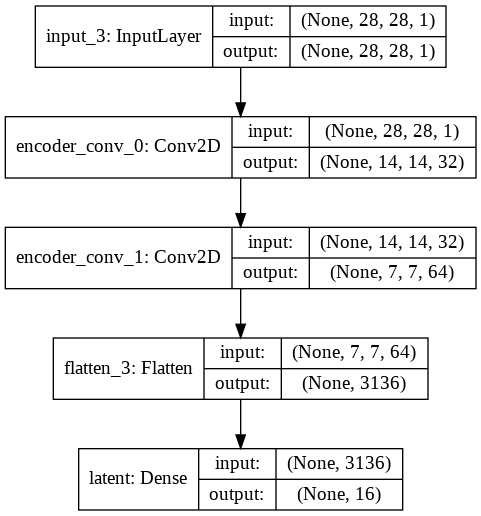

In [0]:
from IPython.display import Image
Image('encoder.png')

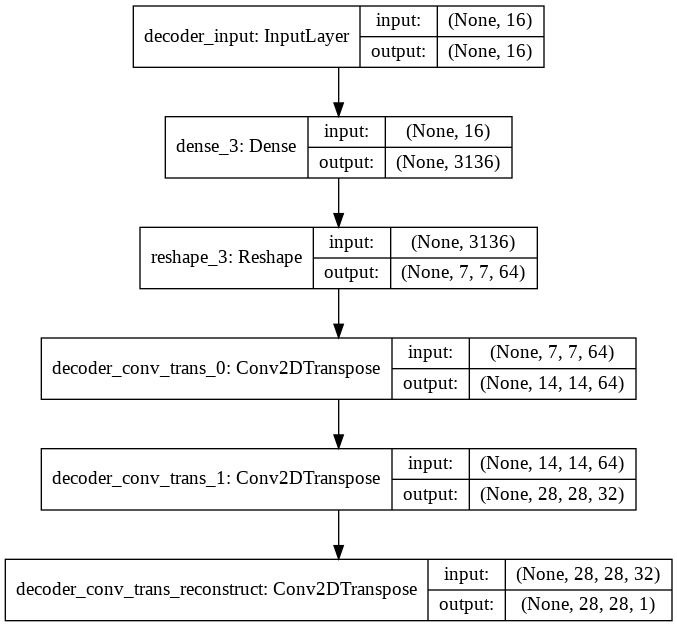

In [0]:
Image('decoder.png')

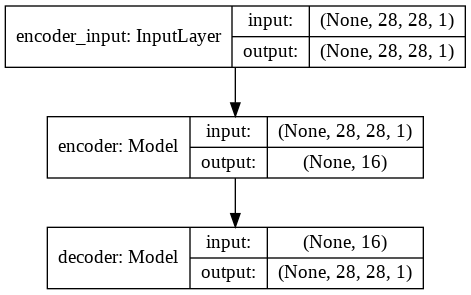

In [0]:
Image('auto-encoder.png')

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32').reshape((-1, 28, 28, 1))/ 255
x_test = x_test.astype('float32').reshape((-1, 28, 28, 1))/ 255

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
def get_encoder_output(encoder_inputs):
    x = encoder_inputs
    
    for filter in filters:
        x = Conv2D(filters = filter,
                   kernel_size=kernel_size,
                   padding=padding,
                   activation=activation,
                   strides=strides,
                   
                  )(x)
        
    conv_shape = K.int_shape(x)
    x = Flatten()(x)
    outputs = Dense(units=latent_dim)(x)
    return outputs , conv_shape

In [0]:
# create encoder
encoder_inputs = Input(shape=(28,28,1), name='encoder_inputs')
encoder_outputs, conv_shape = get_encoder_output(encoder_inputs)
encoder = Model(encoder_inputs, encoder_outputs, name='encoder')
plot_model(encoder, to_file='encoder.png', show_shapes=True)

In [0]:
def get_decoder_outputs(decoder_inputs, conv_shape):
    x = decoder_inputs
    x = Dense(units=conv_shape[1]*conv_shape[2]*conv_shape[3], activation=activation)(x)
    x = Reshape(conv_shape[1:])(x)
    
    for filter in filters[::-1]:
        x = Conv2DTranspose(filters = filter,
                   kernel_size=kernel_size,
                   padding=padding,
                   activation=activation,
                   strides=strides)(x)
    outputs = Conv2DTranspose(filters = 1,
                   kernel_size=1,
                   padding=padding,
                   activation='sigmoid',
                   strides=1)(x)
    return outputs

In [23]:
# create decoder
decoder_inputs = Input(shape=(latent_dim,), name='decoder_inputs')
decoder_outputs = get_decoder_outputs(decoder_inputs, conv_shape)
decoder = Model(decoder_inputs, decoder_outputs, name='decoder')
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_inputs (InputLayer)  (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3136)              53312     
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 28, 28, 1)         33        
Total params: 108,737
Trainable params: 108,737
Non-trainable params: 0
_________________________________________________________________


In [24]:
auto_encoder_inputs = encoder_inputs
auto_encoder_outputs = decoder(encoder(encoder_inputs))
auto_encoder = Model(auto_encoder_inputs, auto_encoder_outputs, name='auto-encoder')    
auto_encoder.summary()
# plot_model(auto_encoder, to_file='auto-encoder.png', show_shapes = True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_inputs (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 16)                69008     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         108737    
Total params: 177,745
Trainable params: 177,745
Non-trainable params: 0
_________________________________________________________________


In [0]:
auto_encoder.compile(loss='mse',
                     optimizer='adam')

In [28]:
auto_encoder.fit(x_train,
                 x_train,
                 batch_size=batch_size,
                 validation_data=(x_test, x_test),
                 epochs=5)

W0828 15:06:27.695266 140548262250368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0828 15:06:27.898088 140548262250368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 28s 474us/step - loss: 0.0216 - val_loss: 0.0106
Epoch 2/5
60000/60000 [==============================] - 22s 374us/step - loss: 0.0099 - val_loss: 0.0090
Epoch 3/5
60000/60000 [==============================] - 22s 367us/step - loss: 0.0087 - val_loss: 0.0084
Epoch 4/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.0081 - val_loss: 0.0079
Epoch 5/5
60000/60000 [==============================] - 22s 369us/step - loss: 0.0077 - val_loss: 0.0077


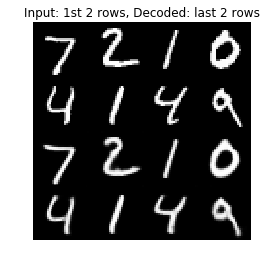

In [29]:
x_decoded = auto_encoder.predict(x_test)
# display the 1st 8 test input and decoded images
imgs = np.concatenate([x_test[:8], x_decoded[:8]])
imgs = imgs.reshape((4, 4, 28, 28))
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure()
plt.axis('off')
plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.savefig('input_and_decoded.png')
plt.show()